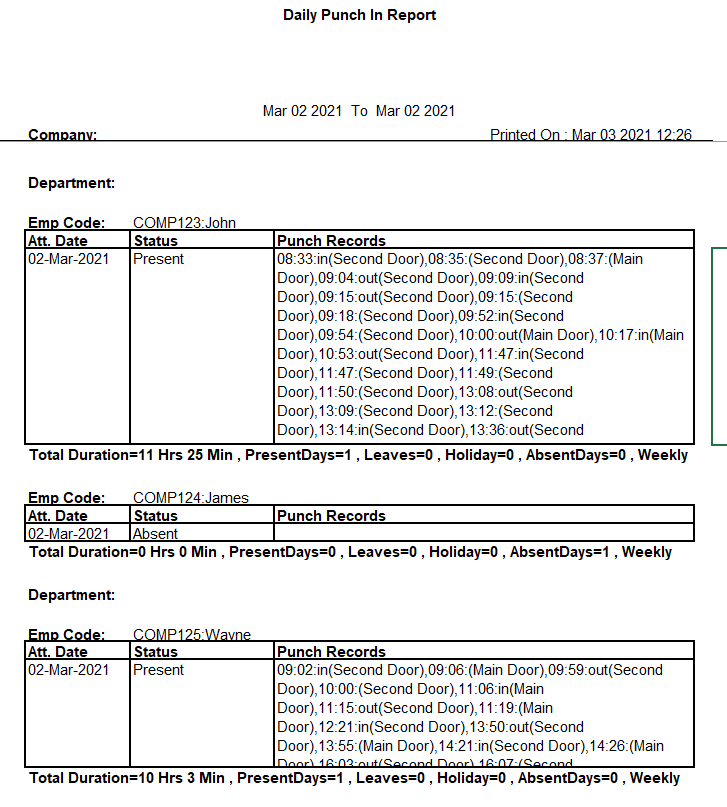

# Problem Statement:

1. Structuring the data.
2. Extracting data (punch in & out) from second door only.
3. Creating a separate column for 'in' and 'out'
4. Identify if any employee forgot to punch in or out.

Here is the Biometric Data for John Sherrif where punch in and punch out records are given for Main Door and Second Door.

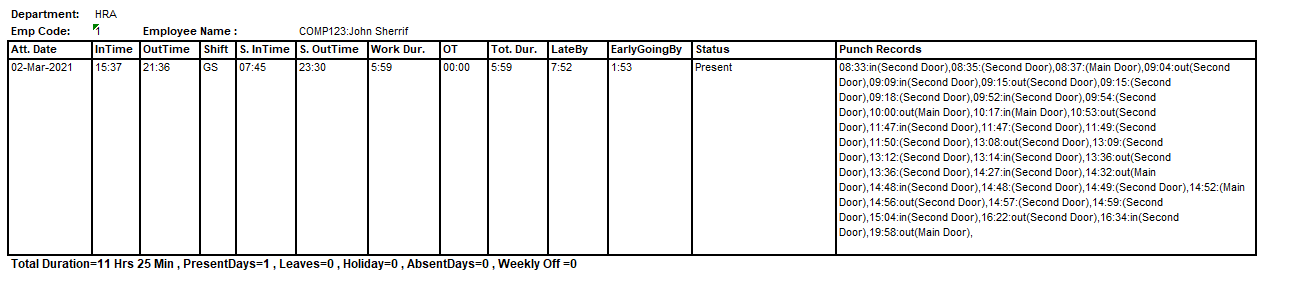

Above Data is not insightful to analyze. Our desired output is:

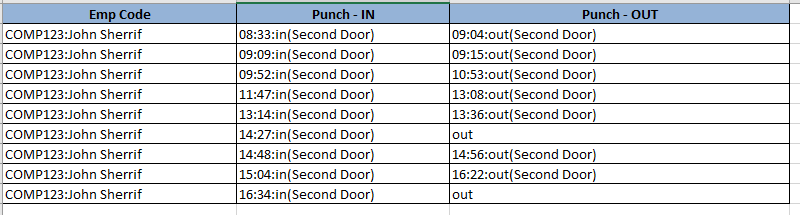

# Understanding the Data:

1. John did Punch - IN at 08:33 for the first time and Punch - OUT at 09:04 for the first time. 
2. John did Punch - IN at 14:27 but forgot to do Punch - OUT.

'in' signifies he/she forgot to do Punch IN and 'out' signifies the vice versa.

In [10]:
import pandas as pd
df = pd.read_excel(r'C:\Users\surya\Desktop\Biometric\bio.xlsx')
df = df.fillna("")
df1 =  df.dropna(how='all')
df1 = df1[df1['Unnamed: 14'].str.contains('sent')]
#Extracting only the Employee Names
df_name =  df.dropna(how='all')
df_name = df_name[df_name['Unnamed: 3'].str.contains('Employee')]
df_name

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
7,,Emp Code:,1,Employee Name :,,,,COMP123:John Sherrif,,,,,,,,,
12,,Emp Code:,6,Employee Name :,,,,COMP124:James Lee,,,,,,,,,
18,,Emp Code:,22,Employee Name :,,,,COMP125:Wayne McDonald,,,,,,,,,


In [11]:
zippedList =  list(zip(df1['Unnamed: 14'], df1['Unnamed: 15'], df_name['Unnamed: 7']))
abc = pd.DataFrame(zippedList)
abc.head()

,0,1,2
0,Present,"08:33:in(Second Door),08:35:(Second Door),08:3...",COMP123:John Sherrif
1,Absent,,COMP124:James Lee
2,Present,"09:02:in(Second Door),09:06:(Main Door),09:59:...",COMP125:Wayne McDonald


In [12]:
#Extracting data for second data only
for i in range (len(abc)):
    abc[1][i] = abc[1][i].split(",")
second_door = []

for i in range (len(abc)):
    s_d = []
   
    for j in range (len(abc[1][i])):
        if ':in(Second Door)' in abc[1][i][j]:
            s_d.append(abc[1][i][j])
            
        if 'out(Second Door)' in abc[1][i][j]:
            s_d.append(abc[1][i][j])
            
    second_door.append(s_d)
(second_door[0])

['08:33:in(Second Door)',
 '09:04:out(Second Door)',
 '09:09:in(Second Door)',
 '09:15:out(Second Door)',
 '09:52:in(Second Door)',
 '10:53:out(Second Door)',
 '11:47:in(Second Door)',
 '13:08:out(Second Door)',
 '13:14:in(Second Door)',
 '13:36:out(Second Door)',
 '14:27:in(Second Door)',
 '14:48:in(Second Door)',
 '14:56:out(Second Door)',
 '15:04:in(Second Door)',
 '16:22:out(Second Door)',
 '16:34:in(Second Door)']

In [13]:
#Creating the pattern: in - out - in - out ..... - out

in_time = []

for i in range (len(second_door)):
    #print(i)
    try:
        if ':in(Second Door)' not in second_door[i][0]:
            second_door[i].insert(0,'in')

    except:
        pass

    

out_time = []
for i in range (len(second_door)):
    #print(i)
    try:

        if ':out(Second Door)' not in second_door[i][(len(second_door[i]))-1]:
            second_door[i].insert(((len(second_door[i]))),'out')
    except:
        pass

 

final_in = []
final_out = []


for k in range (len(second_door)):
    in_gate=[]
    out_gate=[]

    for i in range (len(second_door[k])):
        if i%2 ==0 and 'in' in second_door[k][i]:
            in_gate.append(second_door[k][i])
            try:
                if 'out' not in second_door[k][i+1]:
                    out_gate.append('out')
            except:
                pass
        if i%2 !=0 and 'out' in second_door[k][i]:   
            out_gate.append(second_door[k][i])
            try:
                if 'in' not in second_door[k][i+1]:
                    in_gate.append('in')
            except:
                pass
        if i%2 !=0 and 'in' in second_door[k][i]:
            in_gate.append(second_door[k][i])
            #out_gate.append('out')
            try:
                if 'out' not in second_door[k][i+1]:
                    out_gate.append('out')
            except:
                pass

        if i%2 ==0 and 'out' in second_door[k][i]:   
            out_gate.append(second_door[k][i])
            #in_gate.append('in')
            try:
                if 'in' not in second_door[k][i+1]:
                    in_gate.append('in')
            except:
                pass
    final_in.append(in_gate)
    final_out.append(out_gate)
    
aa = final_in[0]
for i in range (len(final_in)-1):
    aa = aa + final_in[i+1]
len(aa)


bb = final_out[0]
for i in range (len(final_out)-1):
    bb = bb + final_out[i+1]
len(bb)


df_final = []
df_final = pd.DataFrame(df_final)

Name=[]
for i in range (len(abc)):
    for j in range (len(final_in[i])):
        Name.append(abc[2][i])
df_final['Name'] = Name

In [21]:
zippedList2 =  list(zip(df_final['Name'], aa,bb))
abc2 = pd.DataFrame(zippedList2)
abc2.columns = ['Emp Code','Punch - IN','Punch - OUT']
abc2.to_excel(r'C:\Users\surya\Desktop\Biometric\output.xlsx',index= False)
abc2

,Emp Code,Punch - IN,Punch - OUT
0,COMP123:John Sherrif,08:33:in(Second Door),09:04:out(Second Door)
1,COMP123:John Sherrif,09:09:in(Second Door),09:15:out(Second Door)
2,COMP123:John Sherrif,09:52:in(Second Door),10:53:out(Second Door)
3,COMP123:John Sherrif,11:47:in(Second Door),13:08:out(Second Door)
4,COMP123:John Sherrif,13:14:in(Second Door),13:36:out(Second Door)
5,COMP123:John Sherrif,14:27:in(Second Door),out
6,COMP123:John Sherrif,14:48:in(Second Door),14:56:out(Second Door)
7,COMP123:John Sherrif,15:04:in(Second Door),16:22:out(Second Door)
8,COMP123:John Sherrif,16:34:in(Second Door),out
9,COMP125:Wayne McDonald,09:02:in(Second Door),09:59:out(Second Door)


# Output:

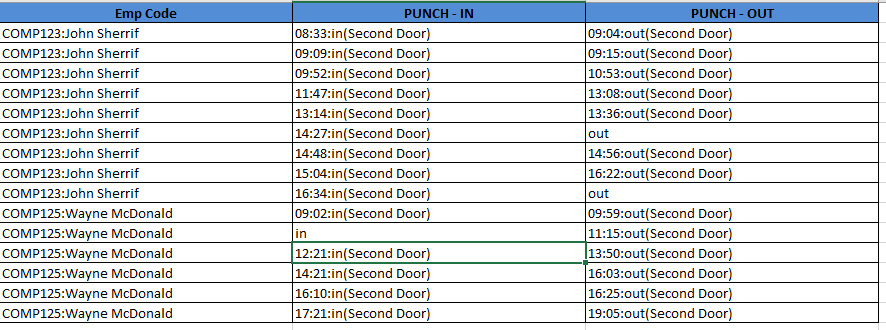